In [ ]:
import os
 
os.environ['CUDA_VISIBLE_DEVICES'] = '3'

import torch
import numpy as np

import random
import copy

seed = 2024
random.seed(seed)
torch.manual_seed(seed)
np.random.seed(seed)

print(torch.initial_seed())

output_root_img = 'img/'
output_root_data = 'data/'

2024


In [12]:
# vit
file_path_attention_block = f'{output_root_data}MI_attention_block.pt'
# mamba
file_path_ssm_forward = f'{output_root_data}MI_ssm_forward.pt'


tensor_attention_block = torch.load(file_path_attention_block)
tensor_ssm_forward = torch.load(file_path_ssm_forward)

print(tensor_attention_block.shape) # []
print(tensor_ssm_forward.shape) # []

torch.Size([24, 197])
torch.Size([48, 197])


In [ ]:
# To Plot
MI_Tensor = torch.stack([
    tensor_attention_block[0::2],
    tensor_ssm_forward[0::4],
])
MI_Tensor.shape

torch.Size([2, 12, 197])

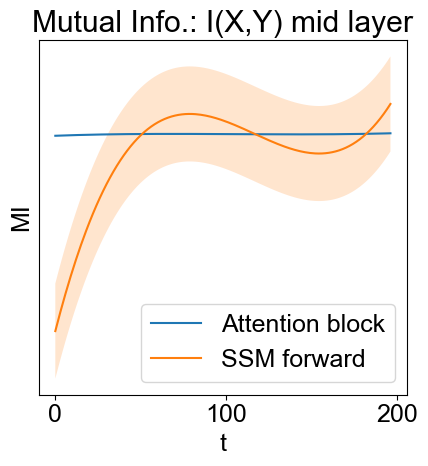

In [ ]:
# Plot the mid layer: idx_layer = 6 out of [0,...,11]
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 18})
matplotlib.rcParams['font.family'] = 'Arial'
idx_layer = 6
_MI_Tensor = MI_Tensor.transpose(0, 1)

degree = 3 # fitting degree
MI = _MI_Tensor[idx_layer]

indices = np.arange(MI.shape[-1])

coefficients = [np.polyfit(indices, _MI, degree) for _MI in MI]

poly = [np.poly1d(coeff) for coeff in coefficients]

fit_values = [p(indices) for p in poly]

mean = [np.mean(fv) for fv in fit_values]
std = [np.std(fv) for fv in fit_values]
# _max = max((fit_values[0] + std[0]).max(), (fit_values[1] + std[1]).max())
# _min = min((fit_values[0] - std[0]).min(), (fit_values[1] - std[1]).min())
# print(_max, _min) 1.86, -5.93
plt.figure(figsize=(5, 5))
plt.plot(indices, fit_values[0], '-', label=f'Attention block')
plt.fill_between(indices, fit_values[0] - std[0], fit_values[0] + std[0], alpha=0.2, label=None)
plt.plot(indices, fit_values[1], '-', label=f'SSM forward')
plt.fill_between(indices, fit_values[1] - std[1], fit_values[1] + std[1], alpha=0.2, label=None)
plt.title(f'Mutual Info.: I(X,Y) mid layer')
plt.xlabel('t')
plt.ylabel('MI')
plt.legend(loc='lower right')

plt.tight_layout()
plt.yticks([])
plt.savefig(output_root_img+f'MI_Attention_SSM.pdf', bbox_inches='tight')

plt.show()